# Part 1 - Building up a basic predictive model

In [2]:
#importing required libraries & dataset for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("diabetic_data.csv")

## 1. Data cleaning and transformation:

In [4]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.shape

(101766, 50)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
data.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

### Replace all missing values with the numpy.nan

In [8]:
# a loop that checks all the columns that have missing values and replace those values with NaN 
for col in data.columns:
    data[col] = data[col].replace({'?': np.nan})
    data[col] = data[col].replace({'None': np.nan})

In [9]:
pd.options.display.max_columns = None
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
# checking the percentage of Nan values in coloumns 
data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

weight                      96.86
max_glu_serum               94.75
A1Cresult                   83.28
medical_specialty           49.08
payer_code                  39.56
race                         2.23
diag_3                       1.40
diag_2                       0.35
diag_1                       0.02
encounter_id                 0.00
troglitazone                 0.00
tolbutamide                  0.00
pioglitazone                 0.00
rosiglitazone                0.00
acarbose                     0.00
miglitol                     0.00
citoglipton                  0.00
tolazamide                   0.00
examide                      0.00
glipizide                    0.00
insulin                      0.00
glyburide-metformin          0.00
glipizide-metformin          0.00
glimepiride-pioglitazone     0.00
metformin-rosiglitazone      0.00
metformin-pioglitazone       0.00
change                       0.00
diabetesMed                  0.00
glyburide                    0.00
repaglinide   

### Drop all columns that have more than 50% of missing values

In [11]:
# perc to assign the 50% and calculate the minimum count and then check to drop all columns that have more than 50% missing values
perc = 50.0 # Like N %
min_count =  int(((100-perc)/100)*data.shape[0] + 1)

data = data.dropna( axis=1, thresh=min_count)

In [12]:
data.shape

(101766, 47)

In [13]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Drop columns for which over 95% of their values are the same


In [14]:
drop_columns_name=[]
for col in data.columns:
    values=data[col].value_counts()
    for i in values:
        if (i/len(data[col]))*100 > 95:
            drop_columns_name.append(col)

In [15]:
drop_columns_name.__len__()

16

In [16]:
print(drop_columns_name)

['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [17]:
data.drop(drop_columns_name, axis=1, inplace=True)

In [18]:
data.shape

(101766, 31)

In [19]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


### Transform the age to be the middle value in each given range.

In [20]:
def ageMiddleValue(age_range):
    age_range=age_range[1:-1].split('-')
    return (int(age_range[0])+int(age_range[1]))//2
data.age=[ageMiddleValue(i) for i in data.age.values]

In [21]:
data.age.values

array([ 5, 15, 25, ..., 75, 85, 75], dtype=int64)

### Replace possible missing values in the columns diag_1, diag_2, and diag_3 by the number 0

In [22]:
data['diag_1'] = data['diag_1'].replace({np.nan: 0})


In [23]:
data['diag_2'] = data['diag_2'].replace({np.nan: 0})

In [24]:
data['diag_3'] = data['diag_3'].replace({np.nan: 0})

In [25]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,0,0,1,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


### Drop all rows with missing values

In [26]:
data.dropna(inplace=True)

In [27]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,Orthopedics-Reconstructive,58,2,15,0,0,0,821,276,285,9,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,Nephrology,59,3,11,0,0,0,V56,403,599,6,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,InternalMedicine,77,5,19,0,0,0,238,250.02,733,5,No,No,No,No,No,No,Steady,No,Yes,NO


### Identify all numerical features and form a list of numerical features and another for the remaining categorical features

In [28]:
categorical = []
numerical = []
for col in data.columns:
    if data[col].dtypes == "object":
        categorical.append(col)
    else:
        numerical.append(col)

In [29]:
print("Categorical")
print(categorical)
print("\nNumerical")
print(numerical)

Categorical
['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']

Numerical
['encounter_id', 'patient_nbr', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


### Identify outliers in the numerical columns and remove them. To keep it simple, you may decide to only keep values that are within 3 standard deviations away from the mean for each feature of the dataset

In [30]:
standard_deviations = 3
for col in numerical:
    data[((data[col] - data[col].mean()) / data[col].std()).abs() < standard_deviations]


In [31]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,Orthopedics-Reconstructive,58,2,15,0,0,0,821,276,285,9,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,Nephrology,59,3,11,0,0,0,V56,403,599,6,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,InternalMedicine,77,5,19,0,0,0,238,250.02,733,5,No,No,No,No,No,No,Steady,No,Yes,NO


In [32]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
101735,443739044,106595208,Caucasian,Male,75,2,6,7,6,MC,Emergency/Trauma,46,5,14,0,0,1,575,577,250,9,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85,1,13,7,3,MC,Emergency/Trauma,45,0,26,1,0,1,486,276,428,9,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75,1,22,7,8,MC,InternalMedicine,51,6,19,0,0,0,410,311,250,9,No,No,No,No,No,No,Steady,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75,3,6,1,3,MC,Orthopedics,27,1,29,0,1,0,715,401,250,9,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [33]:
data.shape

(27140, 31)

### Remove duplicates in the column patient_nbr and show the shape of the resulting dataframe

In [34]:
data.drop_duplicates(subset="patient_nbr", inplace=True)

In [35]:
data.shape

(19729, 31)

## 2. Data exploration:

### Age has a higher impact on readmission

In [36]:
data['readmitted'].loc[data['readmitted']=='NO']=0

C:\Users\khans\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
data['readmitted'].loc[data['readmitted']!=0]=1
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,Orthopedics-Reconstructive,58,2,15,0,0,0,821,276,285,9,No,No,No,No,Up,No,Steady,Ch,Yes,0
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,Nephrology,59,3,11,0,0,0,V56,403,599,6,No,No,No,No,No,No,Steady,No,Yes,0
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,No,Steady,No,No,No,No,No,No,Yes,0
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,Steady,No,No,No,No,No,Steady,Ch,Yes,0
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,InternalMedicine,77,5,19,0,0,0,238,250.02,733,5,No,No,No,No,No,No,Steady,No,Yes,0


<AxesSubplot:xlabel='age', ylabel='count'>

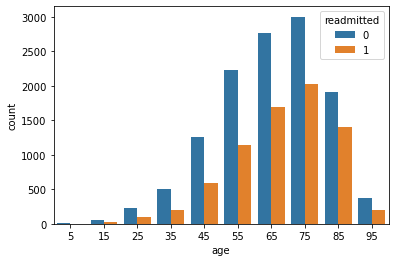

In [38]:
import seaborn as sns
sns.countplot(x='age',hue='readmitted',data=data)

In [39]:
data.readmitted.value_counts()

0    12348
1     7381
Name: readmitted, dtype: int64

### African Americans are more likely to be re-admitted than other ethnic groups

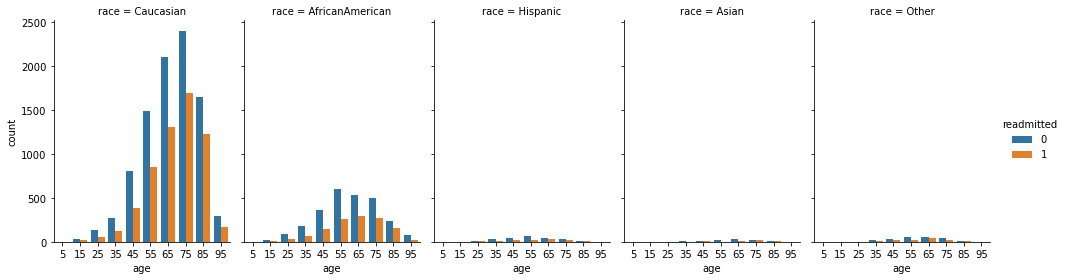

In [40]:
sns.catplot(x="age", hue="readmitted", col="race",
                data=data, kind="count",
                height=4, aspect=.7);

### Women patients are more likely to be re-admitted than men

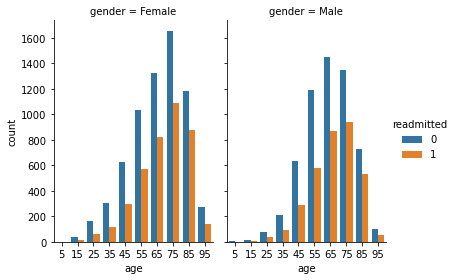

In [41]:
sns.catplot(x="age", hue="readmitted", col="gender",
                data=data, kind="count",
                height=4, aspect=.7);

### Diagnose types have a higher impact on re-admission rates. For this purpose, you need to take into account the icd_codes and plot say diag_1 vs readmitted

<AxesSubplot:xlabel='readmitted', ylabel='count'>

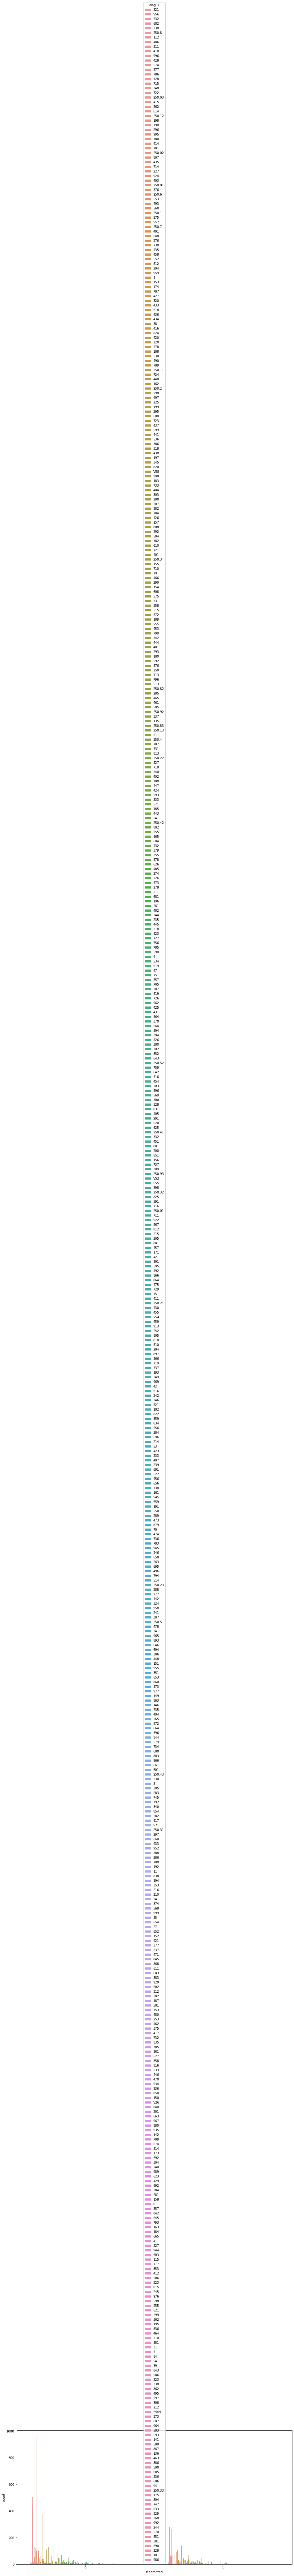

In [42]:
plt.figure(figsize=[16,8])
sns.countplot(x='readmitted',hue='diag_1',data=data)

## 3. Model building

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn

In [44]:
numerical_data=['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'readmitted']

In [45]:
numerical_data=data[numerical_data]

In [46]:
numerical_data.head()

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
20446,15,0,0,7,0,72091308,75,58,9,2,0
20737,11,0,0,3,0,72848634,65,59,6,3,0
20824,9,0,0,4,0,73062156,95,56,6,1,0
21083,18,0,0,10,0,73731852,75,68,6,1,0
23879,19,0,0,12,0,81355914,75,77,5,5,0


In [47]:
numerical_data= numerical_data.astype(int)

In [48]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19729 entries, 20446 to 101749
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_medications     19729 non-null  int32
 1   number_outpatient   19729 non-null  int32
 2   number_emergency    19729 non-null  int32
 3   time_in_hospital    19729 non-null  int32
 4   number_inpatient    19729 non-null  int32
 5   encounter_id        19729 non-null  int32
 6   age                 19729 non-null  int32
 7   num_lab_procedures  19729 non-null  int32
 8   number_diagnoses    19729 non-null  int32
 9   num_procedures      19729 non-null  int32
 10  readmitted          19729 non-null  int32
dtypes: int32(11)
memory usage: 1.5 MB


In [49]:
numerical_data.shape

(19729, 11)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(numerical_data.iloc[:,:-1],numerical_data.iloc[:,-1],test_size=0.2, random_state = 42)

In [51]:
x_train.shape

(15783, 10)

In [52]:
x_test.shape

(3946, 10)

In [53]:
y_train

78574    0
84455    0
32594    0
37907    1
75220    0
        ..
59298    0
62314    0
38369    1
27307    0
79071    1
Name: readmitted, Length: 15783, dtype: int32

### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.predict(x_test)
rfc.score(x_test, y_test)

0.6490116573745565

In [55]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array([1, 1, 0, ..., 0, 0, 0])

### Cross Validation Score

In [57]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#Implementing cross validation

k= 10
kf = KFold(n_splits=k, random_state=None)
model = RandomForestClassifier()
 
result = cross_val_score(model , x_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.644176256651183


In [59]:
accuracy_rf = accuracy_score(y_test, rfc_pred)
accuracy_rf

0.6490116573745565

### Confusion Matrix

Classification report:

               precision    recall  f1-score   support

           0       0.67      0.84      0.75      2435
           1       0.57      0.34      0.43      1511

    accuracy                           0.65      3946
   macro avg       0.62      0.59      0.59      3946
weighted avg       0.63      0.65      0.62      3946

Confusion Matrix :


<AxesSubplot:>

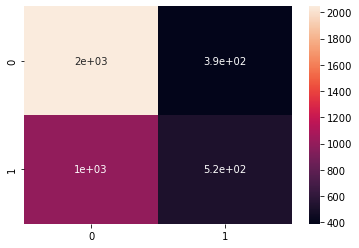

In [60]:
print('Classification report:\n\n', sklearn.metrics.classification_report(y_test,rfc.predict(x_test)))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(numerical_data.readmitted.unique())
sns.heatmap(
    confusion_matrix(y_test,rfc.predict(x_test)),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

# Part 2 - Improved model

## 1.

In [62]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2, random_state=0)
kmeans1.fit(x_train)
prediction = kmeans1.predict(x_test)

In [63]:
len(prediction)

3946

In [64]:
len(y_test)

3946

In [65]:
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
accuracy_kmean = accuracy_score(y_test, prediction)
accuracy_kmean

0.5162189559047137

In [67]:
y_test

50528    1
39813    1
63323    0
44020    0
32278    0
        ..
46623    0
28324    1
59479    1
45081    0
81584    1
Name: readmitted, Length: 3946, dtype: int32

Classification report:

               precision    recall  f1-score   support

           0       0.59      0.70      0.64      2435
           1       0.31      0.22      0.26      1511

    accuracy                           0.52      3946
   macro avg       0.45      0.46      0.45      3946
weighted avg       0.49      0.52      0.50      3946

Confusion Matrix :


<AxesSubplot:>

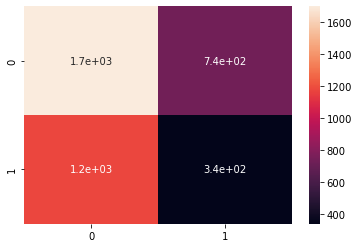

In [68]:
print('Classification report:\n\n', sklearn.metrics.classification_report(y_test,prediction))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(numerical_data.readmitted.unique())
sns.heatmap(
    confusion_matrix(y_test, prediction),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

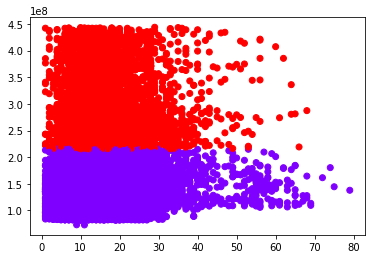

In [69]:
plt.scatter(x_train.iloc[:, [0]].values,x_train.iloc[:, [5]].values, c=kmeans1.labels_, cmap='rainbow')

No handles with labels found to put in legend.


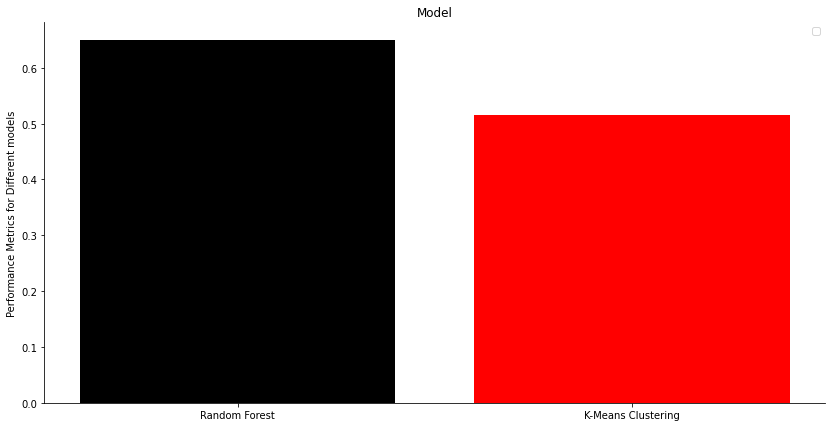

In [76]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Random Forest', 'K-Means Clustering']
values = [accuracy_rf, accuracy_kmean]
model = np.arange(len(models))

plt.bar(model, values,  color=['black','red'])
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()